## Analyzing Patient Data

We are studying inflammation in patients who have been given a new treatment for arthritis,
and need to analyze the first dozen data sets.
The data sets are stored in [comma-separated values](./gloss.html#csv) (CSV) format:
each row holds information for a single patient,
and the columns represent successive days.
The first few rows of our first file look like this:

    0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
    0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
    0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
    0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
    0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1

We want to:

*   load that data into memory,
*   calculate the average inflammation per day across all patients, and
*   plot the result.

To do all that, we'll have to learn a little bit about programming.

#### Objectives

*   Explain what a library is, and what libraries are used for.
*   Load a Python library and use the things it contains.
*   Read tabular data from a file into a program.
*   Assign values to variables.
*   Select individual values and subsections from data.
*   Perform operations on arrays of data.
*   Display simple graphs.

### Loading Data

Words are useful,
but what's more useful are the sentences and stories we use them to build.
Similarly,
while a lot of powerful tools are built into languages like Python,
even more lives in the [libraries](./gloss.html#library) they are used to build.

In order to load our inflammation data,
we need to [import](./gloss.html#import) a library called NumPy
that knows how to operate on matrices:

In [2]:
import numpy as np

Importing a library is like getting a piece of lab equipment out of a storage locker
and setting it up on the bench.
Once it's done,
we can ask the library to read our data file `inflammation-01.csv`:

In [3]:
np.loadtxt(fname = "inflammation-01.csv", delimiter = ",")

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

Hint: The expression `numpy.loadtxt(...)` is a [function call](./gloss.html#function-call)
that asks Python to run the function `loadtxt` that belongs to the `numpy` library.
This [dotted notation](./gloss.html#dotted-notation) is used everywhere in Python
to refer to the parts of things as `whole.part`.

`numpy.loadtxt` has two [parameters](./gloss.html#parameter):
the name of the file we want to read,
and the [delimiter](./gloss.html#delimiter) that separates values on a line.
These both need to be character strings (or [strings](./gloss.html#string) for short),
so we put them in quotes.

When we are finished typing and press Shift+Enter,
the notebook runs our command.
Since we haven't told it to do anything else with the function's output,
the notebook displays it.
In this case,
that output is the data we just loaded.
By default,
only a few rows and columns are shown
(with `...` to omit elements when displaying big arrays).
To save space,
Python displays numbers as `1.` instead of `1.0`
when there's nothing interesting after the decimal point.

Our call to `numpy.loadtxt` read our file,
but didn't save the data in memory.
To do that,
we need to [assign](./gloss.html#assignment) the array to a [variable](./gloss.html#variable).
A variable is just a name for a value,
such as `x`, `current_temperature`, or `subject_id`.
We can create a new variable simply by assigning a value to it using `=`.  Let's practice by assigning a value to a variable called `weight_kg`.

In [4]:
weight_kg = 55

Once a variable has a value, we can print it:

In [5]:
print("weight in kg:", weight_kg)

weight in kg: 55


and do arithmetic with it.  What is the weight converted to pounds?

In [6]:
2.20462262 * weight_kg

121.2542441

We can also change a variable's value by assigning it a new one, and then print that out.  Remember that if you use several arguments to `print`, they should be separated by commas.

In [7]:
print("weight in pounds:", 2.20462262 * weight_kg)

weight in pounds: 121.2542441


If we imagine the *variable* as a sticky note with a name written on it,
assignment is like putting that sticky note on a particular value:

<img src="http://metameso.org/~joe/ds4d/python-sticky-note-variables-01.svg" alt="Variables as Sticky Notes" />

This means that assigning a value to one variable does *not* change the values of other variables.
For example,
let's store the subject's weight in pounds in a variable:

In [8]:
weight_lb = 2.20462262 * weight_kg
weight_kg = 57.5
print("weight in kg now:", weight_kg)

weight in kg now: 57.5


<img src="http://metameso.org/~joe/ds4d/python-sticky-note-variables-02.svg" alt="Creating Another Variable" />

and then change `weight_kg`, and print both variables out.

In [9]:
print("weight in kg now:", weight_kg, ";but weight in lb is still :", weight_lb)
print(",which should be:", 2.20462262 * weight_kg)

weight in kg now: 57.5 ;but weight in lb is still : 121.2542441
,which should be: 126.76580064999999


<img src="http://metameso.org/~joe/ds4d/python-sticky-note-variables-03.svg" alt="Updating a Variable" />

Since `weight_lb` doesn't "remember" where its value came from,
it isn't automatically updated when `weight_kg` changes.
This is different from the way spreadsheets work.

Now that we've been reminded about how to assign things to variables,
let's re-run `numpy.loadtxt` and save its result:

In [10]:
data = np.loadtxt(fname = "inflammation-01.csv", delimiter = ",")

This statement doesn't produce any output because assignment doesn't display anything.
If we want to check that our data has been loaded,
we can `print` the variable's value.  (Since we are using python interactively, we could also just evaluate the *name* of the variable to display its value as output.)

In [11]:
data

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

#### Challenges for extra practice

1.  Draw diagrams showing what variables refer to what values after each statement in the following program:

    ~~~python
    mass = 47.5
    age = 122
    mass = mass * 2.0
    age = age - 20
    ~~~

1.  What does the following program print out?

    ~~~python
    first, second = 'Grace', 'Hopper'
    third, fourth = second, first
    print(third, fourth)
    ~~~

In [12]:
mass = 47.5
age = 122
mass = mass * 2.0 # 95.0
age = age - 20 # 102
print(mass, age)

95.0 102


### Manipulating Data

Now that our data is in memory,
we can start doing things with it.
First,
let's ask what [type](./gloss.html#data-type) of thing `data` refers to:

In [13]:
type(data)

numpy.ndarray

The output tells us that `data` currently refers to an N-dimensional array created by the NumPy library.
We can see what its [shape](./gloss.html#shape) is like this:

In [14]:
data.shape

# 60 patients, 40 days

(60, 40)

This tells us that `data` has 60 rows and 40 columns.
`data.shape` is a [member](./gloss.html#member) of `data`,
i.e.,
a value that is stored as part of a larger value.
We use the same dotted notation for the members of values
that we use for the functions in libraries
because they have the same part-and-whole relationship.

If we want to get a single value from the matrix,
we must provide an [index](./gloss.html#index) in square brackets,
just as we do in math.  The cell pointed to by the index `[0,0]` contains the "first" value in the matrix.  Let's print that.

In [15]:
data[0, 0] # data[row_num, col,num] return numpy.float64

0.0

In [16]:
print("middle value in data:", data[int(60/2), int(40/2)])

middle value in data: 13.0


Let's print the "middle" value from the data table too.

Note that programming languages like Fortran and MATLAB start counting at 1,
which is what human beings have done for thousands of years.
However, languages in the C family (including C++, Java, Perl, and Python) count from 0
because that's simpler for computers to do.
As a result,
if we have an M&times;N array in Python,
its indices go from 0 to M-1 on the first axis
and 0 to N-1 on the second.
It takes a bit of getting used to,
but one way to remember the rule is that
the index is how many steps we have to take from the start to get the item we want.

> #### In the Corner
>
> It may also surprise you is that when Python displays an array,
> it shows the element with index `[0, 0]` in the upper left corner
> rather than the lower left.
> This is consistent with the way mathematicians draw matrices,
> but different from the Cartesian coordinates.
> The indices are (row, column) instead of (column, row) for the same reason.

An index like `[30, 20]` selects a single element of an array,
but we can select whole sections as well.
For example,
we can select the first ten days (columns) of values
for the first four (rows) patients using a "slice" notation.
The [slice](./gloss.html#slice) `0:4` means,
"Start at index 0 and go up to, but not including, index 4."

In [17]:
# include: exclude
data[:4, :10]

array([[ 0.,  0.,  1.,  3.,  1.,  2.,  4.,  7.,  8.,  3.],
       [ 0.,  1.,  2.,  1.,  2.,  1.,  3.,  2.,  2.,  6.],
       [ 0.,  1.,  1.,  3.,  3.,  2.,  6.,  2.,  5.,  9.],
       [ 0.,  0.,  2.,  0.,  4.,  2.,  2.,  1.,  6.,  7.]])

The up-to-but-not-including takes a bit of getting used to,
but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don't have to start slices at 0.  Let's select the first ten days for patients 5 through 9.

In [18]:
data[5:10, :10]

array([[ 0.,  0.,  1.,  2.,  2.,  4.,  2.,  1.,  6.,  4.],
       [ 0.,  0.,  2.,  2.,  4.,  2.,  2.,  5.,  5.,  8.],
       [ 0.,  0.,  1.,  2.,  3.,  1.,  2.,  3.,  5.,  3.],
       [ 0.,  0.,  0.,  3.,  1.,  5.,  6.,  5.,  5.,  8.],
       [ 0.,  1.,  1.,  2.,  1.,  3.,  5.,  3.,  5.,  8.]])

Furthermore, we don't have to take all the values in the slice---if we provide a [stride](./gloss.html#stride),
Python takes values spaced that far apart.  Let's select every even-numbered day for patients 0, 3, 6, and 9 using the slices-with-strides `0:10:3` and `0:10:2`.

In [41]:
data[0:10:3] # patitent num which is multiple of 3 in range(0,10)
data[0:10:2] # patitent num which is even number in in range(0,10), 0 is even


array([[  0.,   0.,   1.,   3.,   1.,   2.,   4.,   7.,   8.,   3.,   3.,
          3.,  10.,   5.,   7.,   4.,   7.,   7.,  12.,  18.,   6.,  13.,
         11.,  11.,   7.,   7.,   4.,   6.,   8.,   8.,   4.,   4.,   5.,
          7.,   3.,   4.,   2.,   3.,   0.,   0.],
       [  0.,   1.,   1.,   3.,   3.,   2.,   6.,   2.,   5.,   9.,   5.,
          7.,   4.,   5.,   4.,  15.,   5.,  11.,   9.,  10.,  19.,  14.,
         12.,  17.,   7.,  12.,  11.,   7.,   4.,   2.,  10.,   5.,   4.,
          2.,   2.,   3.,   2.,   2.,   1.,   1.],
       [  0.,   1.,   1.,   3.,   3.,   1.,   3.,   5.,   2.,   4.,   4.,
          7.,   6.,   5.,   3.,  10.,   8.,  10.,   6.,  17.,   9.,  14.,
          9.,   7.,  13.,   9.,  12.,   6.,   7.,   7.,   9.,   6.,   3.,
          2.,   2.,   4.,   2.,   0.,   1.,   1.],
       [  0.,   0.,   2.,   2.,   4.,   2.,   2.,   5.,   5.,   8.,   6.,
          5.,  11.,   9.,   4.,  13.,   5.,  12.,  10.,   6.,   9.,  17.,
         15.,   8.,   9.,   3.,  

(We include the lower bound,
but stop when we reach or cross the upper bound.)

But we don't *have* to include the upper and lower bound on the slice.
If we don't include the lower bound,
Python uses 0 by default;
if we don't include the upper,
the slice runs to the end of the axis,
and if we don't include either
(i.e., if we just use ':' on its own),
the slice includes everything.  Try selecting only the first few patients and the last few days using slices.  

In [19]:
print("first 2 patients:", data[:2])
print("last 2 patients:", data[-2:])

first 2 patients: [[  0.   0.   1.   3.   1.   2.   4.   7.   8.   3.   3.   3.  10.   5.
    7.   4.   7.   7.  12.  18.   6.  13.  11.  11.   7.   7.   4.   6.
    8.   8.   4.   4.   5.   7.   3.   4.   2.   3.   0.   0.]
 [  0.   1.   2.   1.   2.   1.   3.   2.   2.   6.  10.  11.   5.   9.
    4.   4.   7.  16.   8.   6.  18.   4.  12.   5.  12.   7.  11.   5.
   11.   3.   3.   5.   4.   4.   5.   5.   1.   1.   0.   1.]]
last 2 patients: [[  0.   0.   0.   1.   4.   5.   6.   3.   8.   7.   9.  10.   8.   6.
    5.  12.  15.   5.  10.   5.   8.  13.  18.  17.  14.   9.  13.   4.
   10.  11.  10.   8.   8.   6.   5.   5.   2.   0.   2.   0.]
 [  0.   0.   1.   0.   3.   2.   5.   4.   8.   2.   9.   3.   3.  10.
   12.   9.  14.  11.  13.   8.   6.  18.  11.   9.  13.  11.   8.   5.
    5.   2.   8.   5.   3.   5.   4.   1.   3.   1.   1.   0.]]


Arrays "know" how to perform some common mathematical operations on their values.
If we want to find the average inflammation for all patients on all days,
for example,
we can just ask the array for its mean value.

In [20]:
mean = data.mean()
print("average inflammation for all patients on all days:", mean)

average inflammation for all patients on all days: 6.14875


`mean` is a [method](./gloss.html#method) of the array,
i.e.,
a function that belongs to it
in the same way that the member `shape` does.
If variables are nouns, methods are verbs:
they are what the thing in question knows how to do.
This is why `data.shape` doesn't need to be called
(it's just a thing)
but `data.mean()` does
(it's an action).
It is also why we need empty parentheses for `data.mean()`:
even when we're not passing in any parameters,
parentheses are how we tell Python to go and do something for us.

NumPy arrays have lots of useful methods.  Let's find the `max`, `min`, and standard deviation `std` for `data`.

In [21]:
print("data max:", data.max())
print("data min:", data.min())
print("data std:", data.std())

data max: 20.0
data min: 0.0
data std: 4.61383319712


When analyzing data,
we often want to look at *partial statistics*,
such as the maximum value per patient
or the average value per day.
One way to do this is to select the data we want to create into a new temporary array,
then ask it to do the calculation.  Let's do this to find the maximum inflammation value for the first patient. Hint: use a slice.

In [23]:
print("maximum inflammation for patient 0:", data[0].max())
print("minimum inflammation for patient 0:", data[0].min())
print("std inflammation for patient 0 std:", data[0].std())
data[0]

maximum inflammation for patient 0: 18.0
minimum inflammation for patient 0: 0.0
std inflammation for patient 0 std: 3.8983971065


array([  0.,   0.,   1.,   3.,   1.,   2.,   4.,   7.,   8.,   3.,   3.,
         3.,  10.,   5.,   7.,   4.,   7.,   7.,  12.,  18.,   6.,  13.,
        11.,  11.,   7.,   7.,   4.,   6.,   8.,   8.,   4.,   4.,   5.,
         7.,   3.,   4.,   2.,   3.,   0.,   0.])

Note, we don't need to store the row in a variable of its own -- alternatively, we can combine the select statement and the method call in one line, since the selected sub-array is itself an array and therefor has the method available.  Try this to find the `max` for the second patient.

In [24]:
print("p2 max:", data[2].max())

p2 max: 19.0


What if we need the maximum inflammation for *all* patients,
or the average inflammation for each day?
As the diagram below shows,
we want to perform these operations across an *axis*:

<img src="http://metameso.org/~joe/ds4d/python-operations-across-axes.svg" alt="Operations Across Axes" />

To support this,
most array methods allow us to specify the axis we want to work on, by providing it as an argument.
If we ask for the average across axis 0, what do we get?

In [27]:
print(data.shape)
print(len(data[0])) # 40 days, columns

(60, 40)
40


As a quick check,
we can ask this array what its shape is:

In [32]:
print(data.mean(axis=0).shape) # we find average across columns - 40 days
print(data.mean(axis=1).shape) # we find average across - 60 patients

(40,)
(60,)


The expression `(40,)` tells us we have an N&times;1 vector.  This is the average inflammation per day for all patients.
If we average across axis 1, we get:

In [36]:
data.mean(axis=1) # average inflammation of 60 patient across 40 days

array([ 5.45 ,  5.425,  6.1  ,  5.9  ,  5.55 ,  6.225,  5.975,  6.65 ,
        6.625,  6.525,  6.775,  5.8  ,  6.225,  5.75 ,  5.225,  6.3  ,
        6.55 ,  5.7  ,  5.85 ,  6.55 ,  5.775,  5.825,  6.175,  6.1  ,
        5.8  ,  6.425,  6.05 ,  6.025,  6.175,  6.55 ,  6.175,  6.35 ,
        6.725,  6.125,  7.075,  5.725,  5.925,  6.15 ,  6.075,  5.75 ,
        5.975,  5.725,  6.3  ,  5.9  ,  6.75 ,  5.925,  7.225,  6.15 ,
        5.95 ,  6.275,  5.7  ,  6.1  ,  6.825,  5.975,  6.725,  5.7  ,
        6.25 ,  6.4  ,  7.05 ,  5.9  ])

which is the average inflammation per patient across all days.

#### Challenges

A subsection of an array is called a [slice](./gloss.html#slice).
We can take slices of character strings as well.  Try finding the first three and last three characters of the string `'oxygen'` this way.

In [37]:
t = "oxygen"
print("first 3 chars:", t[:3])
print("last 3 chars:", t[-3:])

first 3 chars: oxy
last 3 chars: gen


### Some more challenges:

1.  What is the value of `element[:4]`?
    What about `element[4:]`?
    Or `element[:]`?

1.  What is `element[-1]`?
    What is `element[-2]`?
    Given those answers,
    explain what `element[1:-1]` does.

1.  The expression `element[3:3]` produces an [empty string](./gloss.html#empty-string),
    i.e., a string that contains no characters.
    If `data` holds our array of patient data,
    what does `data[3:3, 4:4]` produce?
    What about `data[3:3, :]`?

In [48]:
print(t[:])
print(t[1:-1])# creates a substring from index 1 up to (not including) the final index
print(data[3:3, 4:4])
print(data[3:3, :])

oxygen
xyge

[]
[]


### Plotting

The mathematician Richard Hamming once said,
"The purpose of computing is insight, not numbers,"
and the best way to develop insight is often to visualize data.
Visualization deserves an entire lecture (or course) of its own,
but we can explore a few features of Python's `matplotlib` here.
First,
let's tell the IPython Notebook that we want our plots displayed inline,
rather than in a separate viewing window:

In [89]:
%matplotlib inline  

The `%` at the start of the line signals that this is **a command for the notebook,
rather than a statement in Python**.
Next,
we will import the `pyplot` module from `matplotlib`
and use two of its functions, called `imshow` and `show` to first create and then display a heat map of our data:

(60, 40)


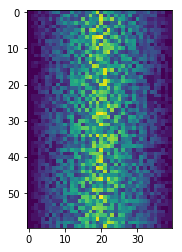

In [55]:
import matplotlib.pyplot as plt
print(data.shape)

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html
# heatmap of the data (i.e. 2d array)
# MxN arrays are mapped to colors based on the norm (mapping scalar to scalar) and the cmap (mapping the normed scalar to a color)
plt.imshow(data)
plt.show()

Blue regions in this heat map are low values, while brighter color show higher values.
As we can see,
inflammation rises and falls over a 40-day period.
Let's take a look at the average inflammation across all patients over time, using the `plot` method.

[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


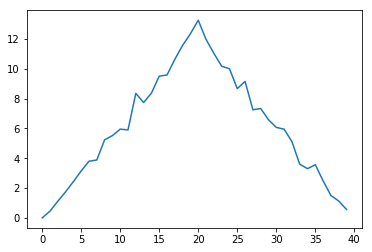

In [60]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html
ave_inflammation = data.mean(axis=0) # inflammation mean across 40 days
print(ave_inflammation)
plt.plot(ave_inflammation)
plt.show()

The result is roughly a linear rise and fall,
which is suspicious:
based on other studies,
we expect a sharper rise and slower fall.
Let's have a look at two other statistics for our population, namely the `max` and `min` inflammation levels.

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.
  10.   9.   8.   7.   6.   5.   4.   3.   2.   1.]


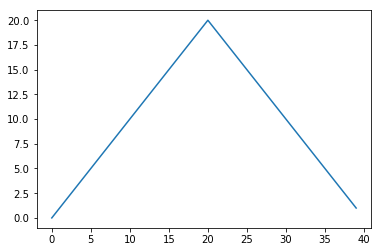

[ 0.  0.  0.  0.  1.  1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  5.
  5.  5.  5.  4.  4.  4.  4.  3.  3.  3.  3.  2.  2.  2.  2.  1.  1.  1.
  1.  0.  0.  0.]


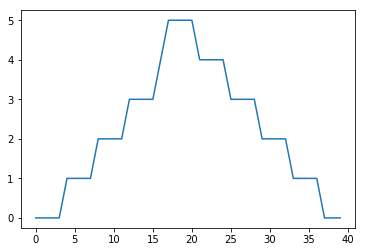

In [59]:
max_inflammation = data.max(axis=0) # min inflammation for 40 days
print(max_inflammation)
plt.plot(max_inflammation)
plt.show()

min_inflammation = data.min(axis=0) # # min inflammation for 40 days
print(min_inflammation)
plt.plot(min_inflammation)
plt.show()

The maximum value rises and falls **perfectly smoothly**,
while the minimum seems to be a **step function**.
Neither result seems particularly likely,
**so either there's a mistake in our calculations
or (more likely) something is wrong with our data**

#### Challenges

1.  Why do all of our plots stop just short of the upper end of our graph?
    Why are the vertical lines in our plot of the minimum inflammation per day not vertical?

1.  Create a plot showing the standard deviation of the inflammation data for each day across all patients.

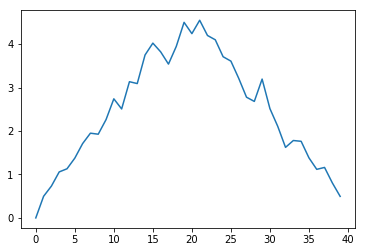

In [61]:
# 1. because matplotlib normally sets x and y axes limits to the min and max of our data (depending on data range)
# 2. see below

std_inflammation = data.std(axis=0) # for 40 days
plt.plot(std_inflammation)
plt.show()

### Wrapping Up

It's very common to create an [alias](./gloss.html#alias) for a library when importing it
in order to reduce the amount of typing we have to do.
The first two lines re-load our libraries as `np` and `plt`,
which are the aliases most Python programmers use.  Let's reload our data one more time as well, for practice, using this aliased library name.  And let's make our our three plots side by side using the `plt` methods `figure`, `subplot`, `ylabel`, `plot`, `tight_layout`, and `show`.  Hint: a good size for the figure is 10 by 3, which is width by height.  Hint: you can use the argument `0` as a shorthand for `axis=0`.  Hint: Given enough time you should be able to figure out how to call the functions by reading the [docs](https://matplotlib.org/api/pyplot_api.html), but it's convenient to know that calling `subplot` with arguments `1`, `3`, and "plot number" will do the job here.

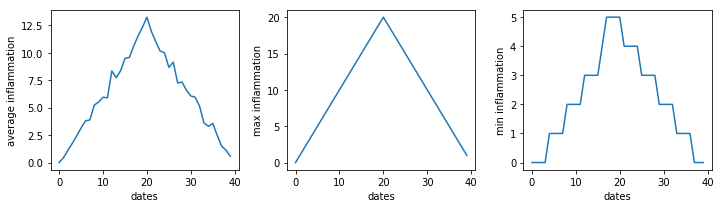

In [79]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(fname = "inflammation-01.csv", delimiter = ",")

# a good size for the figure is 10 by 3, which is width by height
# create a figure
plt.figure(figsize=(10, 3)) # width 10 by height 3 in inches

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html
plt.subplot(1, 3, 1) # rows, cols, sub fignum
plt.xlabel("dates")
plt.ylabel("average inflammation")
plt.plot(data.mean(0)) # data.mean(0) <-> data.mean(axis=0) for 40 days

plt.subplot(1, 3, 2)
plt.xlabel("dates") # plt remembers state of figure, so must subplot before labelling
plt.ylabel("max inflammation")
plt.plot(data.max(0))

plt.subplot(1, 3, 3)
plt.xlabel("dates")
plt.ylabel("min inflammation")
plt.plot(data.min(0))

plt.tight_layout()
plt.show()

The program tells the plotting library
how large we want the figure to be,
that we're creating three sub-plots,
what to draw for each one,
and that we want a tight layout.
(Perversely,
if we leave out that call to `plt.tight_layout()`,
the graphs will actually be squeezed together more closely.)

#### Challenges

1.  Modify the program to display the three plots on top of one another instead of side by side.

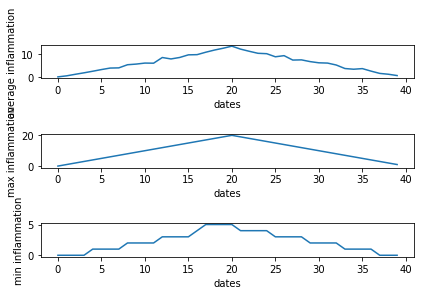

In [82]:
plt.subplot(3, 1, 1) # rows, cols, sub fignum
plt.xlabel("dates")
plt.ylabel("average inflammation")
plt.plot(data.mean(0)) # data.mean(0) <-> data.mean(axis=0) for 40 days

plt.subplot(3, 1, 2)
plt.xlabel("dates") # plt remembers state of figure, so must subplot before labelling
plt.ylabel("max inflammation")
plt.plot(data.max(0))

plt.subplot(3, 1, 3)
plt.xlabel("dates")
plt.ylabel("min inflammation")
plt.plot(data.min(0))

plt.tight_layout()
plt.show()

#### Key Points

*   Import a library into a program using `import libraryname`.
*   Use the `numpy` library to work with arrays in Python.
*   Use `variable = value` to assign a value to a variable in order to record it in memory.
*   Variables are created on demand whenever a value is assigned to them.
*   Use `print(something)` to display the value of `something`.
*   The expression `array.shape` gives the shape of an array.
*   Use `array[x, y]` to select a single element from an array.
*   Array indices start at 0, not 1.
*   Use `low:high` to specify a slice that includes the indices from `low` to `high-1`.
*   All the indexing and slicing that works on arrays also works on strings.
*   Use `# some kind of explanation` to add comments to programs.
*   Use `array.mean()`, `array.max()`, and `array.min()` to calculate simple statistics.
*   Use `array.mean(axis=0)` or `array.mean(axis=1)` to calculate statistics across the specified axis.
*   Use the `pyplot` library from `matplotlib` for creating simple visualizations.

#### Next Steps

Our work so far has convinced us that something's wrong with our first data file.
We would like to check the other 11 the same way,
but typing in the same commands repeatedly is tedious and error-prone.
Since computers don't get bored (that we know of),
we should create a way to do a complete analysis with a single command,
and then figure out how to repeat that step once for each file.
These operations are the subjects of the next two lessons.